In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read the Excel file using openpyxl engine
df = pd.read_excel("matrices.xlsx", engine='openpyxl')

# Now let's visualize the DataFrame to verify that it has been loaded correctly
print(df)


  CUADRATRICA  TRADICIONAL  OPTIMIZADO  STRASSEN
0     100x100            6           6       161
1     200x200           55          52      1135
2     300x300          182         175      7347
3     400x400          443         421      8009
4     500x500          855         825      8221
5     600x600         1482        1413     51110
6     700x700         2320        2252     52359
7     800x800         3449        3353     55952
8     900x900         4937        4762     57265
9   1000x1000         6733        6573     57602


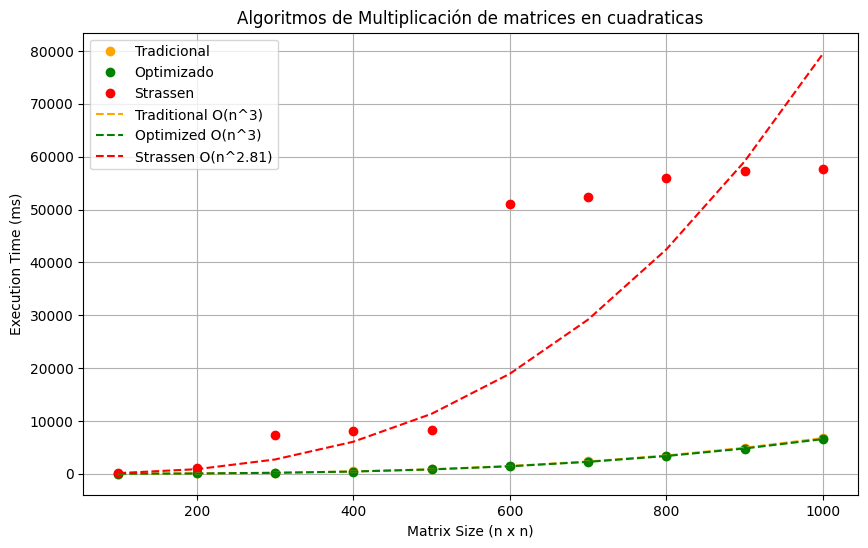

In [7]:
# Preparar los tamaños de las matrices (n) y los tiempos correspondientes para cada algoritmo
sizes = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
traditional_times = df['TRADICIONAL']
optimized_times = df['OPTIMIZADO']
strassen_times = df['STRASSEN']

# Definir las complejidades teóricas
def cubic_complexity(n, c):
    return c * (n ** 3)

def strassen_complexity(n, c):
    return c * (n ** 2.81)  # Exponente aproximado para el algoritmo de Strassen

# Ajustar las constantes para tradicional y optimizado
c_traditional, _ = curve_fit(cubic_complexity, sizes, traditional_times)
c_optimized, _ = curve_fit(cubic_complexity, sizes, optimized_times)
c_strassen, _ = curve_fit(strassen_complexity, sizes, strassen_times)

# Generar curvas ajustadas para la gráfica
traditional_fit = cubic_complexity(sizes, c_traditional[0])
optimized_fit = cubic_complexity(sizes, c_optimized[0])
strassen_fit = strassen_complexity(sizes, c_strassen[0])

# Graficar los puntos reales y las curvas ajustadas
plt.figure(figsize=(10, 6))

# Graficar los tiempos reales
plt.plot(sizes, traditional_times, 'o', label='Tradicional', color='orange')
plt.plot(sizes, optimized_times, 'o', label='Optimizado', color='green')
plt.plot(sizes, strassen_times, 'o', label='Strassen', color='red')

# Graficar las curvas teóricas ajustadas
plt.plot(sizes, traditional_fit, '--', label=f'Traditional O(n^3)', color='orange')
plt.plot(sizes, optimized_fit, '--', label=f'Optimized O(n^3)', color='green')
plt.plot(sizes, strassen_fit, '--', label=f'Strassen O(n^2.81)', color='red')

# Añadir etiquetas y título
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Execution Time (ms)')
plt.title('Algoritmos de Multiplicación de matrices en cuadraticas')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()